In [17]:
import pandas as pd
import re
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# membaca data
df = pd.read_csv('data\data.csv', encoding ='latin-1')

In [19]:
df_abusive = pd.read_csv('data/abusive.csv', encoding = 'latin-1')

In [20]:
df_alay = pd.read_csv('data/new_kamusalay.csv', encoding ='iso-8859-1', header=None)

In [21]:
# ekplorasidata
# membaca data abusive 5 teratas
df_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [22]:
#menghitung banyaknya data abusive dan mengecek adakah data null
print(df_abusive.count())
print('\n')
print(df_abusive.describe())
print('\n')
print(df_abusive.isnull().sum())
print('\n')

ABUSIVE    125
dtype: int64


       ABUSIVE
count      125
unique     125
top       alay
freq         1


ABUSIVE    0
dtype: int64




In [23]:
# membaca data kamus alay 5 teratas
df_alay.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [24]:
#menghitung banyaknya data kamus alay dan mengecek adakah data null
print(df_alay.count())
print('\n')
print(df_alay.describe())
print('\n')
print(df_alay.isnull().sum())
print('\n')

0    15167
1    15167
dtype: int64


                          0      1
count                 15167  15167
unique                15167   8639
top     anakjakartaasikasik   wkwk
freq                      1    100


0    0
1    0
dtype: int64




In [25]:
# membaca data df 5 teratas
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [26]:
#menghitung banyaknya data kamus alay dan mengecek adakah data null
print(df.info())
print('\n')
print(df.describe())
print('\n')
print(df.isnull().sum())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB
None


                 HS       Abusive  HS_Individual      HS_Group   HS_Religion  \
count  13169.000000  13169.000000   13169.000000  13169.000000  13169.000000   
mean       0.422280      0.3

In [27]:
# manipulasi data 

In [28]:
#menghitung data hatespeech
df.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

In [29]:
# menghitung data abusive
df.Abusive.value_counts()

0    8126
1    5043
Name: Abusive, dtype: int64

In [30]:
# menghitung jumlah hate speech dan non hate speech
print("hate speech shape: ", df[(df['HS'] == 1) | (df['Abusive'] == 1)].shape)
print("Non-hate speech shape: ", df[(df['HS'] == 0) & (df['Abusive'] == 0)].shape)

hate speech shape:  (7309, 13)
Non-hate speech shape:  (5860, 13)


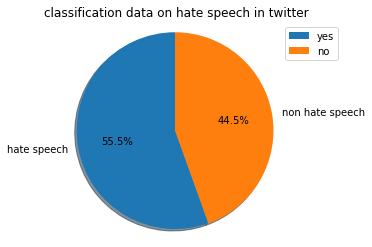

In [31]:
# membuat pie cart untunk membandingkan toxic dan non toxic
labels = ['hate speech', 'non hate speech']
sizes = [7309, 5860]
explode = (0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow =True, startangle=90)
ax1.axis('equal')
plt.title('classification data on hate speech in twitter')
plt.legend(['yes', 'no'])
plt.show()

In [32]:
# menghitung HS berdasarkan jenisnya
print([df.HS_Individual.sum()],
[df.HS_Group.sum()],
[df.HS_Religion.sum()],
[df.HS_Race.sum()],
[df.HS_Physical.sum()],
[df.HS_Gender.sum()],
[df.HS_Other.sum()])

[3575] [1986] [793] [566] [323] [306] [3740]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


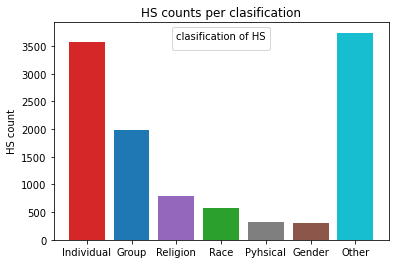

In [33]:
# membuat visualisasi bar chart
fig, ax = plt.subplots()
HS = ['Individual', 'Group', 'Religion', 'Race', 'Pyhsical', 'Gender', 'Other']
counts = [3575, 1986, 793, 566, 323, 306, 3740]
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:green', 'tab:grey', 'tab:brown', 'tab:cyan']
ax.bar(HS, counts, color=bar_colors)

ax.set_ylabel('HS count')
ax.set_title('HS counts per clasification')
ax.legend(title='clasification of HS')

plt.show()

In [34]:
# cleaning data menggunakan RegEx

In [35]:
alay_dict = df_alay.rename(columns={0: 'original', 
                                      1: 'replacement'})

In [36]:
import re

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # membuang semua '\n'
    text = re.sub('rt',' ',text) # membuang semua simbol retweet
    text = re.sub('user',' ',text) # membuang semua username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # membuang semua URL
    text = re.sub('  +', ' ', text) # membuang ekstra spasi
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

# merubah bentuk dataframe menjadi bentuk dictionary
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

#merubah kata kata alay menjadi kata baku
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis


In [43]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_unnecessary_char(text) # 2
    text = remove_nonaplhanumeric(text) # 3
    text = normalize_alay(text) # 4
    return text


In [44]:
df['Tweet'] = df['Tweet'].apply(preprocess)
df.head(10)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak dan kawan kawan xf0 x9f x98 x8...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilihan kepala daerah 2018 aman dan ...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue baru saja selesai re watch aldnoah zero pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,nah admin belanja satu lagi po terbaik nak mak...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak lagi kalau sambil ngewe,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
print(zip(alay_dict['original'], alay_dict['replacement']))

In [38]:
#merubah bentuk dataframe menjadi dict 
list_dummy = list(zip(alay_dict['original'], alay_dict['replacement']))
for i in range (10):
   print(list_dummy[i])

('anakjakartaasikasik', 'anak jakarta asyik asyik')
('pakcikdahtua', 'pak cik sudah tua')
('pakcikmudalagi', 'pak cik muda lagi')
('t3tapjokowi', 'tetap jokowi')
('3x', 'tiga kali')
('aamiin', 'amin')
('aamiinn', 'amin')
('aamin', 'amin')
('aammiin', 'amin')
('abis', 'habis')


In [39]:
alay_dict['replacement']

0                 anak jakarta asyik asyik
1                        pak cik sudah tua
2                        pak cik muda lagi
3                             tetap jokowi
4                                tiga kali
                       ...                
15162    menteri pendidikan dan kebudayaan
15163                  menteri perdagangan
15164                 menteri tenaga kerja
15165                              mentwit
15166                             memegang
Name: replacement, Length: 15167, dtype: object

In [40]:
alay_dict['original']

0        anakjakartaasikasik
1               pakcikdahtua
2             pakcikmudalagi
3                t3tapjokowi
4                         3x
                ...         
15162              mendikbud
15163                 mendag
15164                menaker
15165               memetwit
15166               megangin
Name: original, Length: 15167, dtype: object

In [41]:
#melihat kalimat yang bersih baris
for word in df['Tweet'][20].split(' '):
    if word in alay_dict_map:
        print(''.join(alay_dict_map[word]))
    else :
         print(word)

Asw
ya
tapi
gue
jarang
ngambek,
takut
wkwk
gue
kan
bucin.'
